Data Wrangling and Analysis

In [79]:
import pyreadstat
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Read in the .sav file
df, metadata = pyreadstat.read_sav('C:/Users/innac/Desktop/VSCodeDesktop/Mira Projects/data/raw/TGH_Finland_original_180320 _RAW.sav')

# Select a subset of 9 variables
variables = ['q0011_0001', 'q0011_0002', 'q0011_0003', 'q0011_0004', 'q0015_0001', 'q0018_0001', 'q0018_0003', 'q0037', 'q0044', 'q0049_0001', 'q0049_0002', 'q0049_0003', 'q0049_0004', 'q0049_0005', 'q0019_0001','q0019_0002', 'q0019_0003', 'q0019_0004',  'q0019_0005', 'q0019_0006', 'q0040']

df_subset = df[df['q0040'] == 2][variables]

df_models = df_subset.dropna()

print(df_models.describe())




       q0011_0001  q0011_0002  q0011_0003  q0011_0004  q0015_0001  q0018_0001  \
count   250.00000  250.000000  250.000000  250.000000  250.000000  250.000000   
mean      4.25200    6.164000    2.408000    2.276000    4.656000    5.184000   
std       2.06435    1.338758    1.726691    1.632939    1.532009    1.153893   
min       1.00000    1.000000    1.000000    1.000000    1.000000    2.000000   
25%       2.00000    6.000000    1.000000    1.000000    4.000000    5.000000   
50%       4.50000    7.000000    2.000000    2.000000    5.000000    5.000000   
75%       6.00000    7.000000    3.000000    3.000000    6.000000    6.000000   
max       7.00000    7.000000    7.000000    7.000000    7.000000    7.000000   

       q0018_0003       q0037  q0049_0001  q0049_0002  q0049_0003  q0049_0004  \
count  250.000000  250.000000  250.000000  250.000000  250.000000   250.00000   
mean     4.544000    2.220000    3.012000    4.240000    3.100000     3.02000   
std      1.647703    1.7388

In [105]:

# Create a dictionary of new variable names
new_names = {'q0011_0001': 'CA1', 
             'q0011_0002': 'CA2',
             'q0011_0003': 'CA3',
             'q0011_0004': 'CA4',
             'q0015_0001': 'PI',
             'q0018_0001': 'GI1',
             'q0018_0003': 'GI2',
             'q0037': 'SO',
             'q0049_0001': 'SC1',
             'q0049_0002': 'SC2',
             'q0049_0003': 'SC3',
             'q0049_0004': 'SC4',
             'q0049_0005': 'SC5',
             'q0019_0001': 'CA5',
             'q0019_0002': 'CA6',
             'q0019_0003': 'CA7',
             'q0019_0004': 'CA8',
             'q0019_0005': 'CA9',
             'q0019_0006': 'CA10'}

# Rename the variables
df_models = df_models.rename(columns=new_names)


print(df_models.describe())

             CA1         CA2         CA3         CA4          PI         GI1  \
count  250.00000  250.000000  250.000000  250.000000  250.000000  250.000000   
mean     4.25200    6.164000    2.408000    2.276000    4.656000    5.184000   
std      2.06435    1.338758    1.726691    1.632939    1.532009    1.153893   
min      1.00000    1.000000    1.000000    1.000000    1.000000    2.000000   
25%      2.00000    6.000000    1.000000    1.000000    4.000000    5.000000   
50%      4.50000    7.000000    2.000000    2.000000    5.000000    5.000000   
75%      6.00000    7.000000    3.000000    3.000000    6.000000    6.000000   
max      7.00000    7.000000    7.000000    7.000000    7.000000    7.000000   

              GI2          SO         SC1         SC2  ...     SC2_Rev  \
count  250.000000  250.000000  250.000000  250.000000  ...  250.000000   
mean     4.544000    2.220000    3.012000    4.240000  ...    3.760000   
std      1.647703    1.738877    1.535345    1.834082  ..

Correlations

In [108]:
correlation_table = df_models.corr()

# Display the correlation table
print(correlation_table)

               CA1       CA2       CA3       CA4            PI       GI1  \
CA1       1.000000  0.518298  0.615504  0.579736  3.462553e-01  0.009118   
CA2       0.518298  1.000000  0.311456  0.265796  2.665067e-01  0.110375   
CA3       0.615504  0.311456  1.000000  0.730474  2.779614e-01  0.081095   
CA4       0.579736  0.265796  0.730474  1.000000  2.837229e-01 -0.005746   
PI        0.346255  0.266507  0.277961  0.283723  1.000000e+00  0.056396   
GI1       0.009118  0.110375  0.081095 -0.005746  5.639562e-02  1.000000   
GI2       0.085870 -0.002374  0.089653  0.048457  1.810263e-01  0.407624   
SO        0.123223  0.036194  0.169283  0.102994  1.495485e-02 -0.120333   
SC1      -0.146675 -0.090839 -0.086688 -0.058993 -2.372728e-01  0.125694   
SC2      -0.105138  0.006804 -0.113473 -0.120095 -1.663123e-01  0.051161   
SC3      -0.107658 -0.048975 -0.043068 -0.022423 -2.804996e-01  0.050180   
SC4      -0.049593 -0.047610  0.041779  0.063285 -2.275485e-01  0.095263   
SC5       0.

C:\Users\innac\AppData\Local\Temp\ipykernel_10716\2154359435.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_table = df_models.corr()


In [111]:
# Assuming you have a DataFrame called models_df
correlation_table = df_models.corr()

# Display the correlation table
print(correlation_table)

               CA1       CA2       CA3       CA4            PI       GI1  \
CA1       1.000000  0.518298  0.615504  0.579736  3.462553e-01  0.009118   
CA2       0.518298  1.000000  0.311456  0.265796  2.665067e-01  0.110375   
CA3       0.615504  0.311456  1.000000  0.730474  2.779614e-01  0.081095   
CA4       0.579736  0.265796  0.730474  1.000000  2.837229e-01 -0.005746   
PI        0.346255  0.266507  0.277961  0.283723  1.000000e+00  0.056396   
GI1       0.009118  0.110375  0.081095 -0.005746  5.639562e-02  1.000000   
GI2       0.085870 -0.002374  0.089653  0.048457  1.810263e-01  0.407624   
SO        0.123223  0.036194  0.169283  0.102994  1.495485e-02 -0.120333   
SC1      -0.146675 -0.090839 -0.086688 -0.058993 -2.372728e-01  0.125694   
SC2      -0.105138  0.006804 -0.113473 -0.120095 -1.663123e-01  0.051161   
SC3      -0.107658 -0.048975 -0.043068 -0.022423 -2.804996e-01  0.050180   
SC4      -0.049593 -0.047610  0.041779  0.063285 -2.275485e-01  0.095263   
SC5       0.

C:\Users\innac\AppData\Local\Temp\ipykernel_10716\65270938.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_table = df_models.corr()


Reverse score SC

In [82]:
df_models['SC1_Rev'] = 8 - df_models['SC1']
df_models['SC2_Rev'] = 8 - df_models['SC2']
df_models['SC3_Rev'] = 8 - df_models['SC3']
df_models['SC4_Rev'] = 8 - df_models['SC4']

In [96]:
import pingouin as pg
# create a dataframe for the CA variables
df_CA = df_models[['CA1', 'CA2', 'CA3', 'CA4', 'CA5', 'CA6', 'CA7', 'CA8', 'CA9', 'CA10']]

# calculate Cronbach's alpha
alpha = pg.cronbach_alpha(data=df_CA)
print('Cronbach Alpha:', alpha)

Cronbach Alpha: (0.9217664102438468, array([0.906, 0.935]))


In [104]:
import pingouin as pg
# create a dataframe for the CA variables
df_SC = df_models[['SC1_Rev', 'SC2_Rev', 'SC3_Rev', 'SC4_Rev', 'SC5']]

# calculate Cronbach's alpha
alpha = pg.cronbach_alpha(data=df_SC)
print('Cronbach Alpha:', alpha)

Cronbach Alpha: (0.6257092244875007, array([0.547, 0.694]))


In [124]:
import numpy as np
import scipy.stats

# Create composite variables
df_models['CA'] = df_models[['CA1', 'CA2', 'CA3', 'CA4', 'CA5', 'CA6', 'CA7', 'CA8', 'CA9', 'CA10']].mean(axis=1)
df_models['SC'] = df_models[['SC1_Rev', 'SC2_Rev', 'SC3_Rev', 'SC4_Rev', 'SC5']].mean(axis=1)
df_models['GI'] = df_models[['GI1', 'GI2']].mean(axis=1)


selected_cols = ['CA', 'SC', 'GI', 'PI']
corr_table = df_models[selected_cols].corr()




# Calculate the correlation coefficients and p-values
corr_matrix = df_models[selected_cols].corr(method='pearson')
pval_matrix = np.zeros((len(selected_cols), len(selected_cols)))
for i in range(len(selected_cols)):
    for j in range(len(selected_cols)):
        if i != j:
            r, pval = scipy.stats.pearsonr(df_models[selected_cols[i]], df_models[selected_cols[j]])
            pval_matrix[i, j] = pval

# Create a new DataFrame to show the correlation coefficients and p-values
corr_df = pd.DataFrame(corr_matrix.values, index=corr_matrix.index, columns=corr_matrix.columns)
pval_df = pd.DataFrame(pval_matrix, index=corr_matrix.index, columns=corr_matrix.columns)

# Flag significant correlations using asterisks (*)
corr_sig = corr_df.applymap(lambda x: '*' if (x > 0.5 or x < -0.5) else '')
pval_sig = pval_df.applymap(lambda x: '*' if x < 0.05 else '')

# Combine correlation coefficients and p-values, and add the asterisks for significant correlations
correlations = corr_df.round(2).astype(str) + pval_sig + corr_sig

print(correlations)

       CA     SC     GI     PI
CA  1.0**  0.19*    0.1  0.44*
SC  0.19*  1.0**  -0.03  0.37*
GI    0.1  -0.03  1.0**  0.15*
PI  0.44*  0.37*  0.15*  1.0**


In [114]:
print(df_models[['GI', 'SC', 'PI', 'CA']].describe())

corr_table = df_models[['GI', 'SC', 'PI', 'CA']].corr()
print(corr_table)




               GI        SC          PI          CA
count  250.000000  250.0000  250.000000  250.000000
mean     4.864000    4.5432    4.656000    3.990000
std      1.182836    0.9797    1.532009    1.431467
min      1.500000    1.6000    1.000000    1.000000
25%      4.000000    4.0000    4.000000    2.900000
50%      5.000000    4.6000    5.000000    4.050000
75%      5.500000    5.2000    6.000000    5.100000
max      7.000000    6.8000    7.000000    7.000000
          GI        SC        PI        CA
GI  1.000000 -0.032339  0.153594  0.096085
SC -0.032339  1.000000  0.373843  0.191289
PI  0.153594  0.373843  1.000000  0.443796
CA  0.096085  0.191289  0.443796  1.000000


Create interaction terms:

In [98]:
df_models['GIxSC'] = df_models['GI'] * df_models['SC']
df_models['GIxCA'] = df_models['GI'] * df_models['CA']
df_models['SCxCA'] = df_models['SC'] * df_models['CA']


In [135]:
pyreadstat.write_sav(df_models, 'cleaned_data.sav')

DESCRIPTIVE STATISTICS:

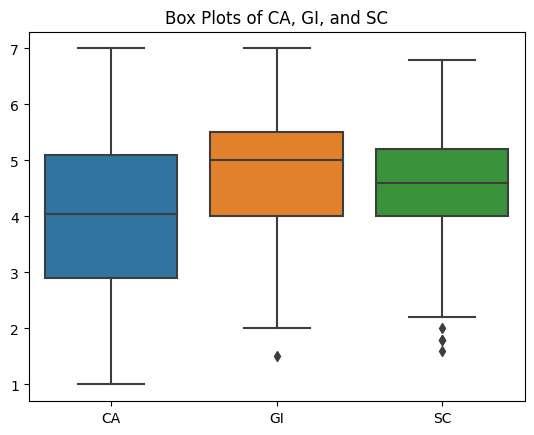

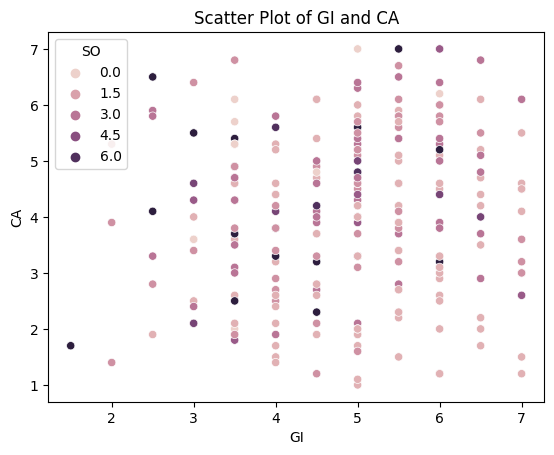

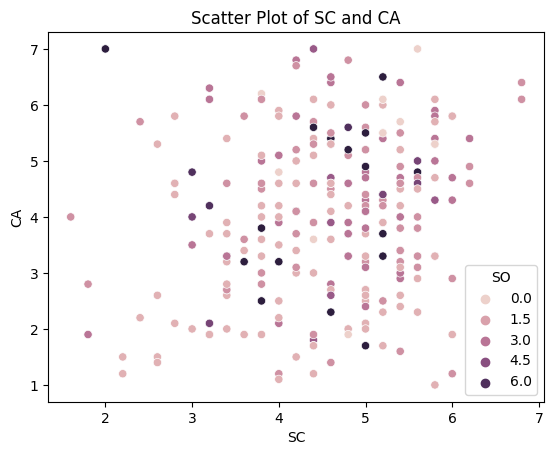

In [99]:
# Create box plots of the variables
sns.boxplot(data=df_models[['CA', 'GI', 'SC']])
plt.title('Box Plots of CA, GI, and SC')
plt.show()


# Create scatter plots of the variables
sns.scatterplot(data=df_models, x='GI', y='CA', hue='SO')
plt.title('Scatter Plot of GI and CA')
plt.show()

sns.scatterplot(data=df_models, x='SC', y='CA', hue='SO')
plt.title('Scatter Plot of SC and CA')
plt.show()

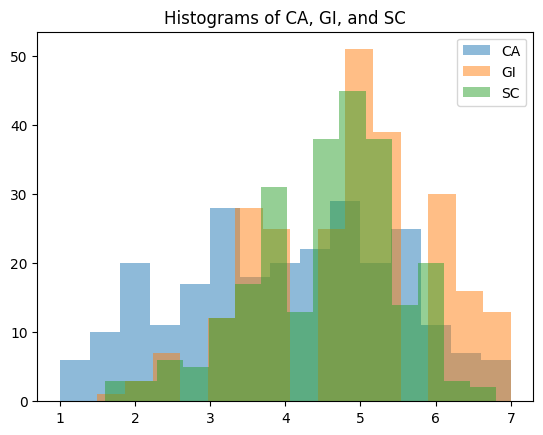

In [87]:
import matplotlib.pyplot as plt

# Create histograms of the variables
plt.hist(df_models['CA'], bins=15, alpha=0.5, label='CA')
plt.hist(df_models['GI'], bins=15, alpha=0.5, label='GI')
plt.hist(df_models['SC'], bins=15, alpha=0.5, label='SC')
plt.legend(loc='upper right')
plt.title('Histograms of CA, GI, and SC')
plt.show()


C:\Users\innac\AppData\Local\Temp\ipykernel_10716\2769261879.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_models['CA'], shade=True, label='CA')
C:\Users\innac\AppData\Local\Temp\ipykernel_10716\2769261879.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_models['GI'], shade=True, label='GI')
C:\Users\innac\AppData\Local\Temp\ipykernel_10716\2769261879.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_models['SC'], shade=True, label='SC')


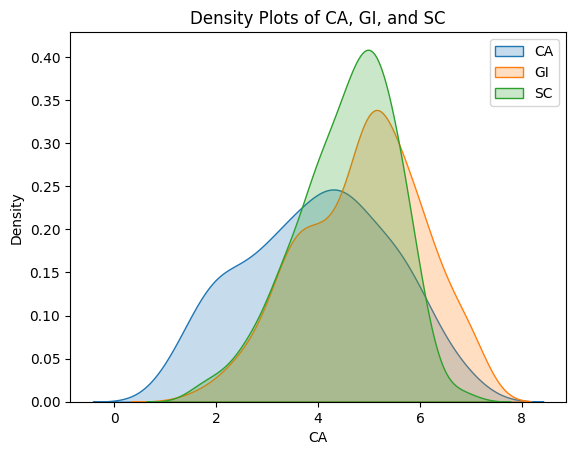

In [88]:
import seaborn as sns

# Create density plots of the variables
sns.kdeplot(df_models['CA'], shade=True, label='CA')
sns.kdeplot(df_models['GI'], shade=True, label='GI')
sns.kdeplot(df_models['SC'], shade=True, label='SC')
plt.legend(loc='upper right')
plt.title('Density Plots of CA, GI, and SC')
plt.show()


In [125]:
import numpy as np
import pandas as pd
import statsmodels.api as sm



# Define predictor, mediator, and outcome variables
predictor = df_models['GI']
mediator = df_models['PI']
outcome = df_models['CA']

# Fit regression models
regress_mediator = sm.GLM(predictor, sm.add_constant(mediator)).fit()
regress_outcome = sm.GLM(outcome, sm.add_constant(predictor)).fit()

# Calculate direct and indirect effects
indirect = regress_mediator.params[1] * regress_outcome.params[1]
direct = regress_outcome.params[0] + regress_mediator.params[1] * regress_outcome.params[1]

# Print results
print('Indirect effect:', indirect)
print('Direct effect:', direct)

Indirect effect: 0.013789553965549978
Direct effect: 3.4381919238188123


In [143]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mediation import Mediation

# Load the data into a pandas DataFrame
df_models = pd.read_csv("my_data.csv")

outcome_var = "GI"
mediator_var = "PI"
predictor_vars = ["CA", "SC"]

# Define the link function for the GLM
probit_link = sm.genmod.families.links.probit()

# Fit the outcome model using GLM
outcome_model = smf.glm(formula=f"{outcome_var} ~ {' + '.join(predictor_vars)}",
                        data=df_models, family=sm.families.Binomial(link=probit_link)).fit()

# Fit the mediator model using OLS
mediator_model = smf.ols(formula=f"{mediator_var} ~ {' + '.join(predictor_vars)}",
                         data=df_models).fit()

# Conduct mediation analysis
med = Mediation(outcome_model, mediator_model, "CA", "SC", outcome_var, mediator_var)
med_result = med.run()

# Print the summary of the mediation analysis
print(med_result.summary())


ModuleNotFoundError: No module named 'mediation'

In [101]:
model1 = smf.glm('CA ~ GI + SC + GIxSC + GIxCA + SCxCA + SO + PI', data=df_models).fit()
print(model1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     CA   No. Observations:                  250
Model:                            GLM   Df Residuals:                      242
Model Family:                Gaussian   Df Model:                            7
Link Function:               identity   Scale:                        0.046881
Method:                          IRLS   Log-Likelihood:                 31.848
Date:                Thu, 30 Mar 2023   Deviance:                       11.345
Time:                        20:36:32   Pearson chi2:                     11.3
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1237      0.297      7.151      0.0

Moderation Model

In [102]:
model2= smf.glm('CA ~ GI*SC + GIxCA + SCxCA + SO + PI', data=df_models).fit()
print(model2.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                     CA   No. Observations:                  250
Model:                            GLM   Df Residuals:                      242
Model Family:                Gaussian   Df Model:                            7
Link Function:               identity   Scale:                        0.046881
Method:                          IRLS   Log-Likelihood:                 31.848
Date:                Thu, 30 Mar 2023   Deviance:                       11.345
Time:                        20:36:34   Pearson chi2:                     11.3
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1237      0.297      7.151      0.0

In [103]:
moderator = 'SC'
model3 = smf.glm(f'{moderator} ~ GI + PI', data=df_models).fit()
df_models[f'{moderator}_resid'] = mod_results.resid_response
model3 = smf.glm('CA ~ GI + SC + GIxSC + GIxCA + SCxCA + SO + PI + SC_resid + GIxSC*SC_resid + GIxCA*SC_resid', data=df_models).fit()
print(model3.summary())



                 Generalized Linear Model Regression Results                  
Dep. Variable:                     CA   No. Observations:                  250
Model:                            GLM   Df Residuals:                      240
Model Family:                Gaussian   Df Model:                            9
Link Function:               identity   Scale:                        0.019845
Method:                          IRLS   Log-Likelihood:                 140.34
Date:                Thu, 30 Mar 2023   Deviance:                       4.7629
Time:                        20:36:59   Pearson chi2:                     4.76
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2856      0.014     19.